In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = "http://bit.ly/w-data"
stu_data = pd.read_csv(url)
print(stu_data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


The data contain only two variables. Our explainatory variable is 'Hours' and Explained Variable is 'Scores'.
So we are going to perform Simple linear regression.Now we must first determine the functional relationship both variables. So, let us first plot the data.

Text(0, 0.5, 'Scores')

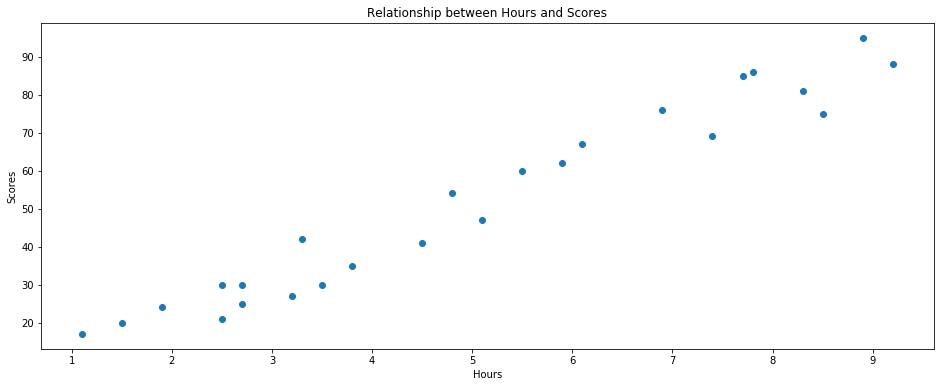

In [3]:
#plotting the data
plt.figure(figsize = (16,6))
plt.scatter(stu_data['Hours'], stu_data['Scores'])
plt.title("Relationship between Hours and Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")

We can see from the Figure above, that a linear relationship exist between both variables. Now let us go ahead and build a machine learning model.

In [4]:
X = stu_data.Hours.values.reshape(-1,1)
y = stu_data.Scores.values.reshape(-1,1)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Now we have divided our data into training and testing sets.

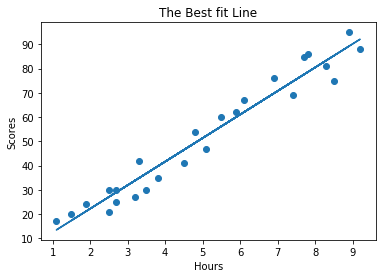

In [6]:
#linear Regression
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train,y_train)
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

plt.scatter(X, y)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('The Best fit Line')
plt.plot(X, line);
plt.show()

In [7]:
# Now let us use our predictive model on Testing set and then evaluate our model.
y_pred = regressor.predict(X_test)
residuals = y_test - y_pred
y_actual = pd.DataFrame(data =y_test, columns = ['actual'])
y_pred = pd.DataFrame(data =y_pred, columns = ['predicted'])
residual = pd.DataFrame(data =residuals, columns = ['residuals'])
df = pd.concat([y_actual,y_pred,residual],
    axis=1,
    join='inner',
    join_axes=None,
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    sort=None,
    copy=True,
)
df

,actual,predicted,residuals
0,81,83.391686,-2.391686
1,30,27.070549,2.929451
2,21,27.070549,-6.070549
3,76,69.796929,6.203071
4,62,60.086388,1.913612
5,25,29.012657,-4.012657
6,42,34.838982,7.161018
7,47,52.317955,-5.317955


now to evaluate the Goodness of fit i.e., R^2 we have to Explained sum of square(ESS), Residual Sum of Square(RSS) and and Total sum of Square(TSS).

In [8]:
mean = y_test.mean()

In [9]:
ESS = ((y_pred-mean)**2).sum()
ESS

predicted    3302.218533
dtype: float64

In [10]:
RSS = (residuals**2).sum()
RSS

188.95566091321393

In [11]:
TSS = RSS+ESS
TSS

predicted    3491.174194
dtype: float64

In [12]:
Rsquared = ESS/TSS
Rsquared

predicted    0.945876
dtype: float64

It means about 94 % of change in Scores can be attributed to change in Hours of Study.

In [13]:
import numpy as np
#Now leat us check the accuracy of our predictive model.
from sklearn import metrics
print ('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squred Error', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.499999999999998
Mean Squred Error 23.61945761415174
Root Mean Squared Error: 4.859985351228103


Now let us see how much One can score with 9.25 hours of study. But one has to remember we do not have any data value above 9.2 hours so the prediction will be on the basis of trend and cannot be held exact answer.

In [14]:
Q = [[9.25]]
answer = regressor.predict(Q)
print(f'Hours : 9.25')
print(f'Score: {answer[0]}')

Hours : 9.25
Score: [92.61670034]
